In [173]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from collections import Counter
import random
import sqlite3
import numpy as np


In [174]:

# Conectar ao banco de dados SQLite
conn = sqlite3.connect('prod/dados_analitico.db')

query = "SELECT * FROM vagas;"


# Ler os dados do banco de dados SQLite para um DataFrame do Pandas
dados = pd.read_sql_query(query, conn)

# Fechar a conexão com o banco de dados
conn.close()
# dados = pd.read_csv("linkedin_jobs.csv")


In [175]:
dados_tec = dados

In [177]:
dados_tec.columns

Index(['index', 'job_id', 'register_date', 'company', 'title', 'location',
       'time_opened', 'link', 'applications', 'experience_level', 'job_type',
       'role', 'sectors', 'description', 'requisitos', 'posicao'],
      dtype='object')

In [178]:
dados_nao_nulos = dados_tec


In [179]:
df = dados_nao_nulos[dados_nao_nulos.requisitos != 'Não especificado']


# # Explodir a coluna 'tecnologia'
df = df.assign(requisitos=df['requisitos'].str.split(', ')).explode('requisitos')

# # Contar ocorrências de cada tecnologia
count_tecnologia = df['requisitos'].value_counts()

# print(count_tecnologia.sum())

In [180]:
df.requisitos.value_counts()

requisitos
SQL           36
PYTHON        29
CLOUD         21
SPARK         20
AZURE         19
AWS           18
AIRFLOW       14
POWERBI       11
GCP           11
GIT            8
EXCEL          8
LINUX          6
EXPRESS        4
NOSQL          4
JAVA           3
SALESFORCE     3
JAVASCRIPT     2
Name: count, dtype: int64

In [181]:
df_temp = dados_nao_nulos[dados_nao_nulos.requisitos!="Não especificado"]

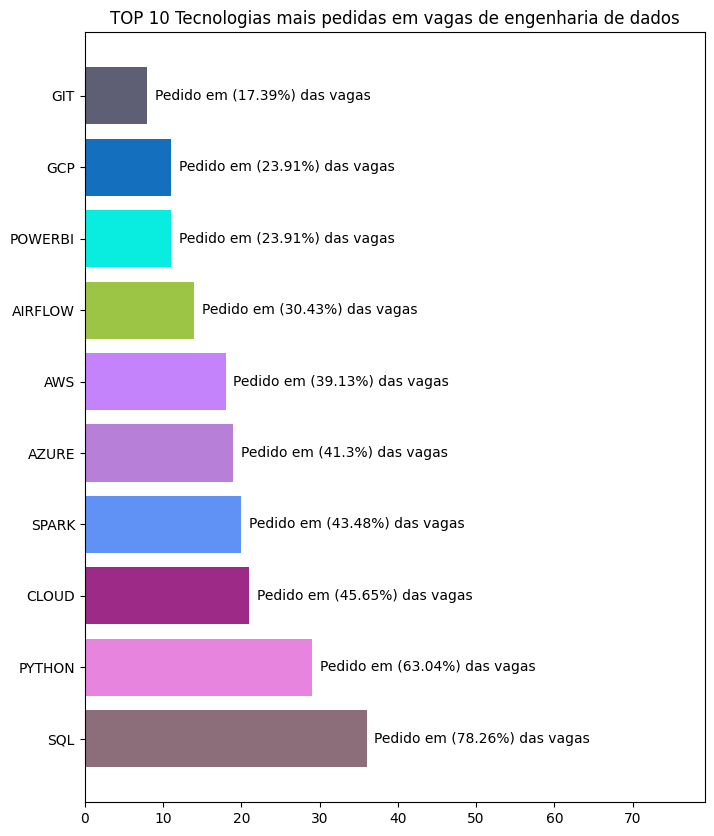

In [214]:
contagem_tecnologias = df.requisitos.value_counts()[:10]
cores = []
for _ in range(len(contagem_tecnologias)):
    cor = (random.random(), random.random(), random.random())
    cores.append(cor)
    
plt.figure(figsize=(8, 10))

bars = plt.barh(contagem_tecnologias.index, contagem_tecnologias, color=cores)
plt.title("TOP 10 Tecnologias mais pedidas em vagas de engenharia de dados")

for bar, valor in zip(bars, contagem_tecnologias):
    plt.text(bar.get_width()+1, bar.get_y() + bar.get_height()/2, f'Pedido em ({round((valor / (len(df_temp))*100),2)}%) das vagas', ha='left', va='center')
plt.xlim(right=max(contagem_tecnologias) * 2.2)
plt.show()

In [210]:
print("TEMOS " + str(len(dados_nao_nulos[dados_nao_nulos.requisitos=='Não especificado'])) +" VAGAS SEM REQUISITOS ESPECIFICADOS")

TEMOS 19 VAGAS SEM REQUISITOS ESPECIFICADOS


In [186]:
regex_str_posicao = 'Estagiário|Estagiario|Junior|Júnior|JR|Nivel 1|Nivel I|Nível 1|Nível I|Pleno/Sênior|Senior|Sênior|SR|Pleno|Tech Lead|Tech-lead|Diretor|Coordenador|Gerente'


In [187]:
#Buscar posicao no titulo da vaga
def busca_posicao(title):
    tecnologia =''
    if re.findall(regex_str_posicao, title,re.IGNORECASE) != []:
        tecnologia = re.findall(regex_str_posicao, title,re.IGNORECASE)[0].upper().replace(" ","").replace("-","")
    else: 
        tecnologia = "Não especificado"
        
    return tecnologia 

def busca_posicao_detalhe(title):
    tecnologia = ''
    tecnologias_encontradas = re.findall(regex_str_posicao, title, re.IGNORECASE)
    
    if tecnologias_encontradas:
        # Conta a frequência das tecnologias encontradas
        contador = Counter(tecnologias_encontradas)
        
        # Escolhe a tecnologia mais frequente
        tecnologia_mais_frequente = contador.most_common(1)[0][0].upper().replace(" ","").replace("-","")
        
        tecnologia = tecnologia_mais_frequente
    else: 
        tecnologia = "Não especificado"
        
    return tecnologia

def busca_posicao_descricao(title):
    tecnologia = ''
    tecnologias_encontradas = re.findall(regex_str_posicao, title, re.IGNORECASE)
    
    if tecnologias_encontradas:
        # Conta a frequência das tecnologias encontradas
        contador = Counter(tecnologias_encontradas)
        
        # Escolhe a tecnologia mais frequente
        tecnologia_mais_frequente = contador.most_common(1)[0][0].upper().replace(" ","").replace("-","")
        
        tecnologia = tecnologia_mais_frequente
    else: 
        tecnologia = "Não especificado"
        
    return tecnologia

In [188]:
dados_nao_nulos['posicao'] = dados_nao_nulos.title.apply(lambda x: busca_posicao(x))

In [189]:
dados_nao_nulos.loc[dados_nao_nulos['posicao']=='Não especificado','posicao']=dados_nao_nulos.experience_level.apply(lambda x: busca_posicao_detalhe(x))

In [190]:
dados_nao_nulos.loc[dados_nao_nulos['posicao']=='Não especificado','posicao']=dados_nao_nulos.description.apply(lambda x: busca_posicao_descricao(x))

In [191]:
dados_nao_nulos.loc[dados_nao_nulos['posicao'].isin(['SR', 'SENIOR']),'posicao']="SÊNIOR"
dados_nao_nulos.loc[dados_nao_nulos['posicao'].isin(['JR']),'posicao']="JUNIOR"
dados_nao_nulos.loc[dados_nao_nulos['posicao'].isin(['JÚNIOR']),'posicao']="JUNIOR"
dados_nao_nulos.loc[dados_nao_nulos['posicao'].isin(['NÍVELI','NÍVEL1']),'posicao']="JUNIOR"
dados_nao_nulos.loc[dados_nao_nulos['posicao'].isin(['TECH LEAD,TECH-LEAD']),'posicao']="TECH-LEAD"
dados_nao_nulos.loc[dados_nao_nulos['posicao'].isin(['ESTAGIÁRIO']),'posicao']="ESTAGIARIO"

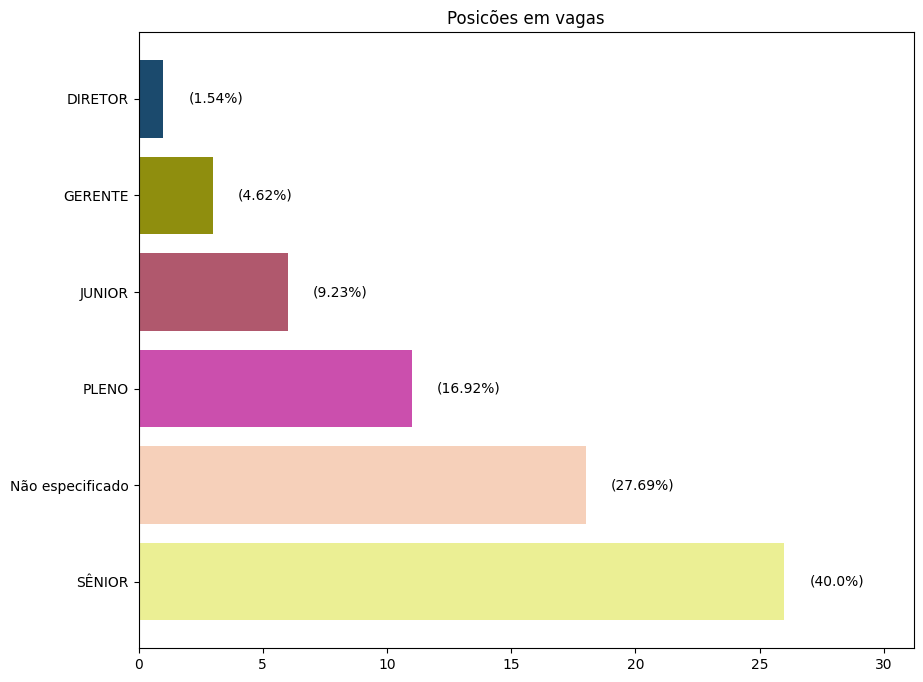

In [213]:
contagem_posicoes = dados_nao_nulos.posicao.value_counts()
cores = []
for _ in range(len(contagem_posicoes)):
    cor = (random.random(), random.random(), random.random())
    cores.append(cor)
    
plt.figure(figsize=(10, 8))

bars = plt.barh(contagem_posicoes.index, contagem_posicoes, color=cores)
plt.title("Posicões em vagas")

for bar, valor in zip(bars, contagem_posicoes):
    plt.text(bar.get_width()+1, bar.get_y() + bar.get_height()/2, f'({round((valor / (len(dados_nao_nulos.posicao)))*100,2)}%)', ha='left', va='center')
plt.xlim(right=max(contagem_posicoes) * 1.2)
plt.show()

In [193]:
dados_grafico2=dados_nao_nulos[(dados_nao_nulos.posicao!='Não especificado') & (dados_nao_nulos.requisitos!='Não especificado') & (dados_nao_nulos.posicao!="DIRETOR")& (dados_nao_nulos.posicao!="COORDENADOR")& (dados_nao_nulos.posicao!="ESTAGIARIO")& (dados_nao_nulos.posicao!="GERENTE")& (dados_nao_nulos.posicao!="TECHLEAD")& (dados_nao_nulos.posicao!="PLENO/SÊNIOR")]  


In [194]:
dados_explodidos = dados_grafico2.assign(requisitos=dados_grafico2['requisitos'].str.split(', ')).explode('requisitos')

# Em seguida, agrupe pelos valores da coluna 'posicao' e conte os valores da coluna 'requisitos' após a explosão
contagem_requisitos = dados_explodidos.groupby('posicao')['requisitos'].value_counts()

contagem_requisitos2 = dados_explodidos.groupby(['posicao', 'requisitos']).size()

# Use value_counts() e depois nlargest() para obter os 10 principais valores
top10_por_posicao = contagem_requisitos2.groupby(level=0).nlargest(10).reset_index(level=1, drop=True)

# Agora você tem a contagem de cada requisito para cada posição


[[ 2.  1.  1.  2.  0.  2.  2.  2.  0.  0.  3.  3.  5.]
 [ 3.  5.  5.  5.  0.  3.  0.  0.  2.  3.  6.  4. 10.]
 [ 7.  9. 12. 11.  5.  4.  0.  0.  0.  7. 15.  8. 16.]]


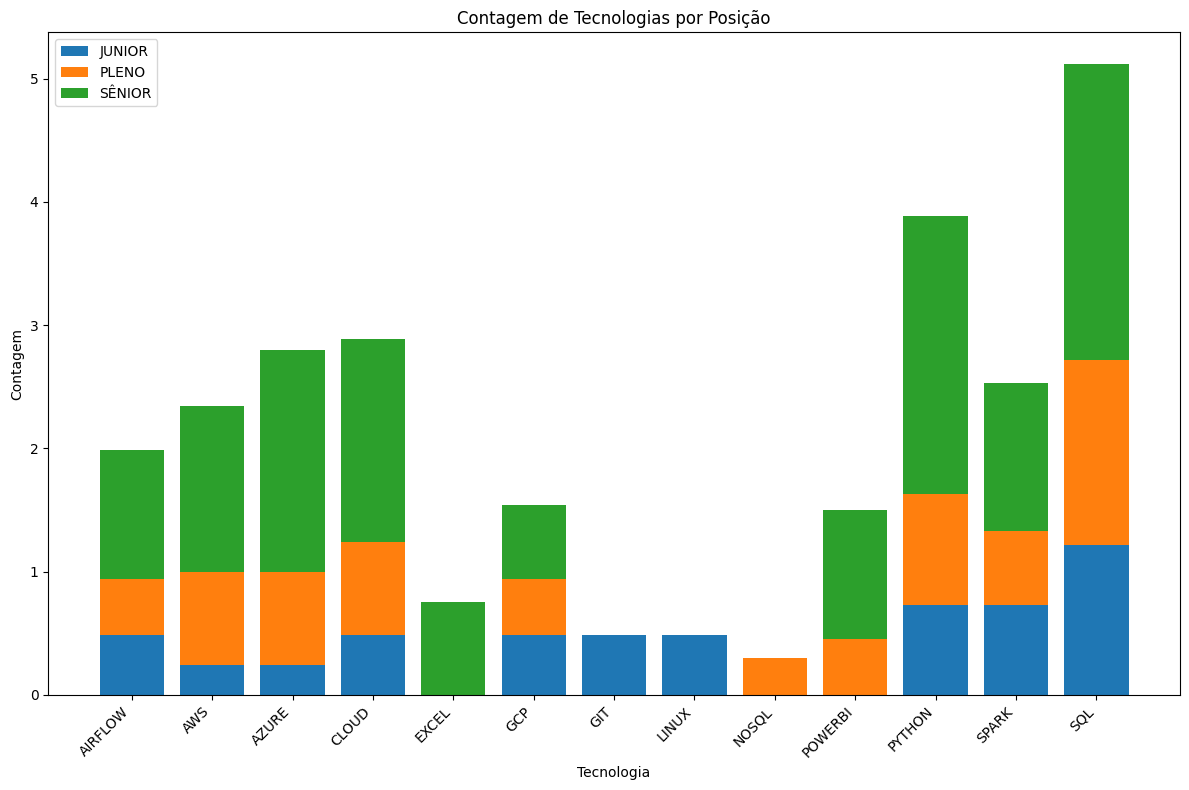

In [195]:
dados = top10_por_posicao

posicoes = sorted(set(posicao for posicao, _ in dados.keys()))
tecnologias = sorted(set(tecnologia for _, tecnologia in dados.keys()))

# Criar uma matriz de contagem de tecnologias para todas as posições
matriz_contagem = np.zeros((len(posicoes), len(tecnologias)))

# Preencher a matriz com as contagens reais
for i, posicao in enumerate(posicoes):
    for j, tecnologia in enumerate(tecnologias):
        matriz_contagem[i, j] = dados.get((posicao, tecnologia), 0)

# Criar o gráfico de barras empilhadas
plt.figure(figsize=(12, 8))
print(matriz_contagem)


total_vacancies = np.sum(matriz_contagem)

# Percentages for each position
percentages = np.array([0.2438, 0.15, 0.15])  # Junior, Pleno, Senior

# Calculate target number of vacancies for each position
target_vacancies = percentages * total_vacancies

# Adjust the vacancies in the matrix according to the target number of vacancies
adjusted_matrix = np.zeros_like(matriz_contagem)
for i in range(matriz_contagem.shape[0]):
    for j in range(matriz_contagem.shape[1]):
        position_percentage = matriz_contagem[i, j] / total_vacancies
        adjusted_matrix[i, j] = target_vacancies[i] * position_percentage    
        
bottom = np.zeros(len(tecnologias))
for i, posicao in enumerate(posicoes):
    plt.bar(tecnologias, adjusted_matrix[i], label=posicao, bottom=bottom)
    bottom += adjusted_matrix[i]


plt.xlabel('Tecnologia')
plt.ylabel('Contagem')
plt.title('Contagem de Tecnologias por Posição')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Mostrar o gráfico
plt.show()

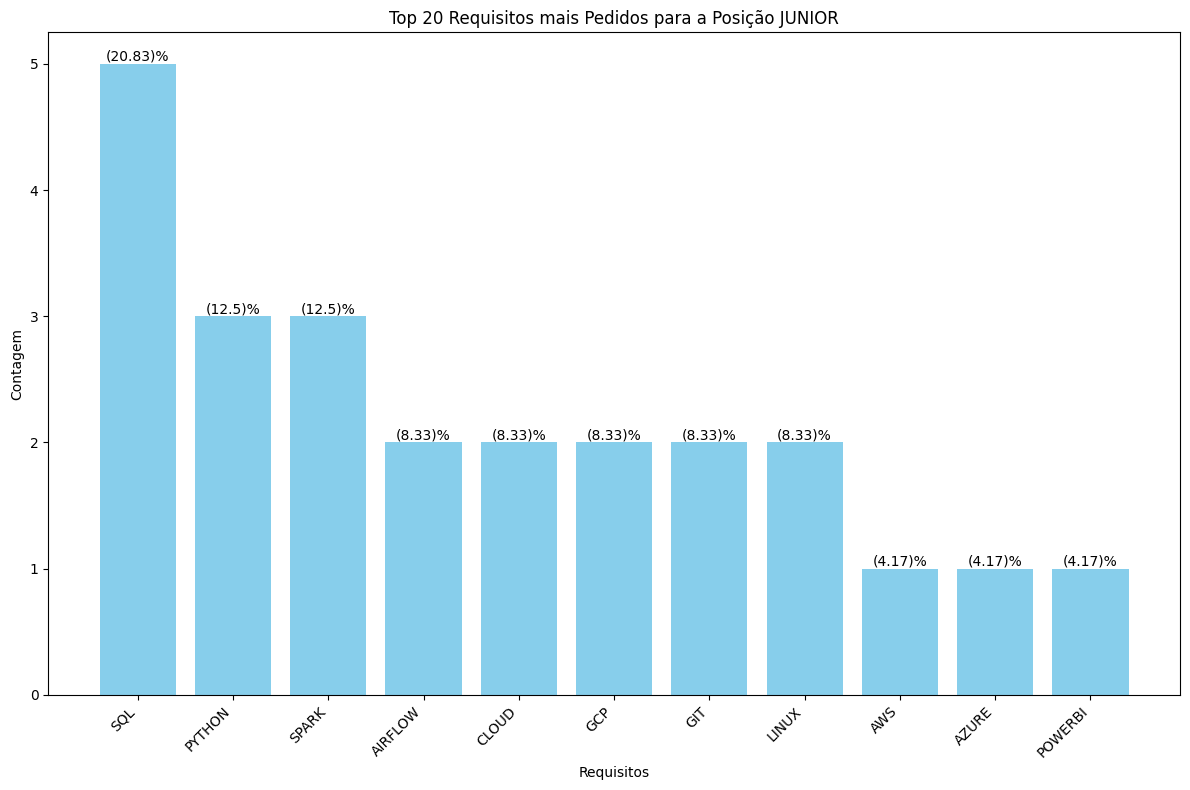

In [196]:
dados_junior = contagem_requisitos.loc['JUNIOR']

# Selecionar apenas os 10 primeiros requisitos mais pedidos
dados_junior_top10 = dados_junior.head(20)

# Criar o gráfico de barras
plt.figure(figsize=(12, 8))
bars=plt.bar(dados_junior_top10.index, dados_junior_top10.values, color='skyblue')

for bar, valor in zip(bars, dados_junior_top10.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'({round((valor/(dados_junior_top10.values.sum())*100),2)})%', ha='center', va='bottom')

plt.xlabel('Requisitos')
plt.ylabel('Contagem')
plt.title('Top 20 Requisitos mais Pedidos para a Posição JUNIOR')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

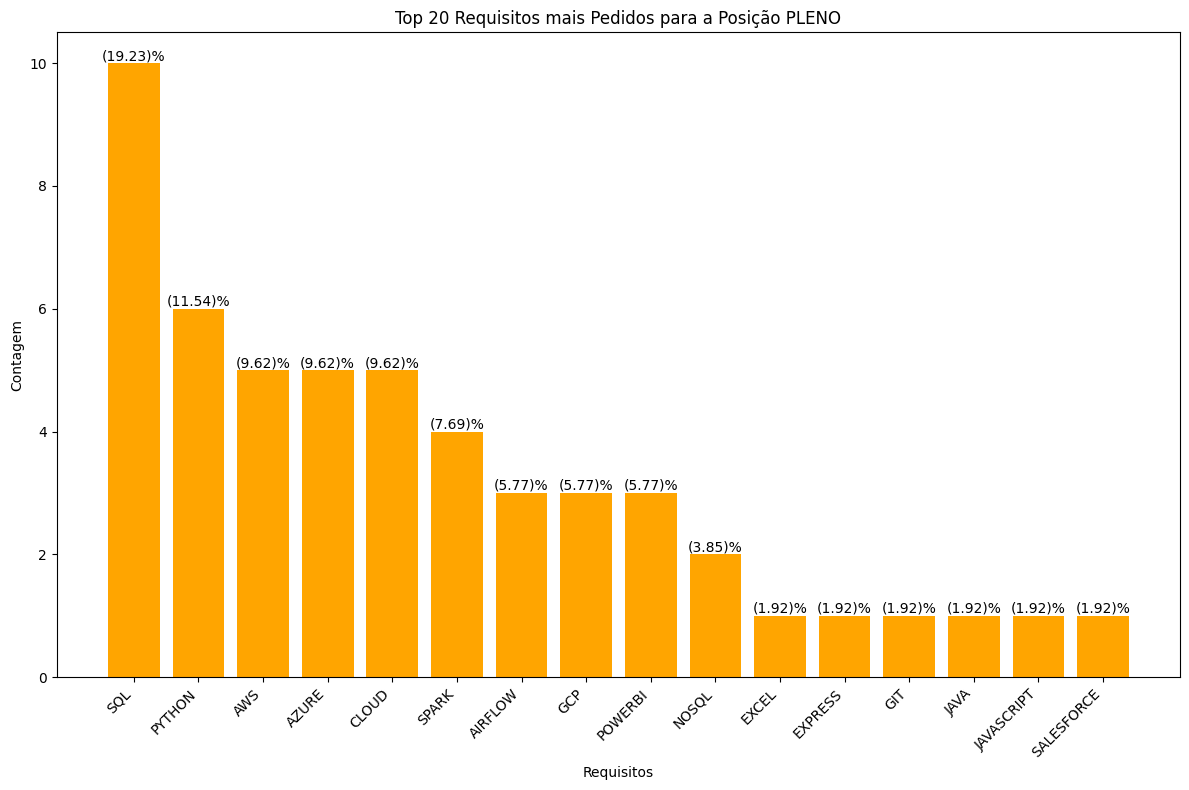

In [197]:
# Selecionar apenas os 10 primeiros requisitos mais pedidos
dados_pleno = contagem_requisitos.loc['PLENO']
dados_pleno_top10 = dados_pleno.head(20)

# Criar o gráfico de barras
plt.figure(figsize=(12, 8))
bars = plt.bar(dados_pleno_top10.index, dados_pleno_top10.values, color='orange')

for bar, valor in zip(bars, dados_pleno_top10.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'({round((valor/(dados_pleno_top10.values.sum())*100),2)})%', ha='center', va='bottom')

plt.xlabel('Requisitos')
plt.ylabel('Contagem')
plt.title('Top 20 Requisitos mais Pedidos para a Posição PLENO')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

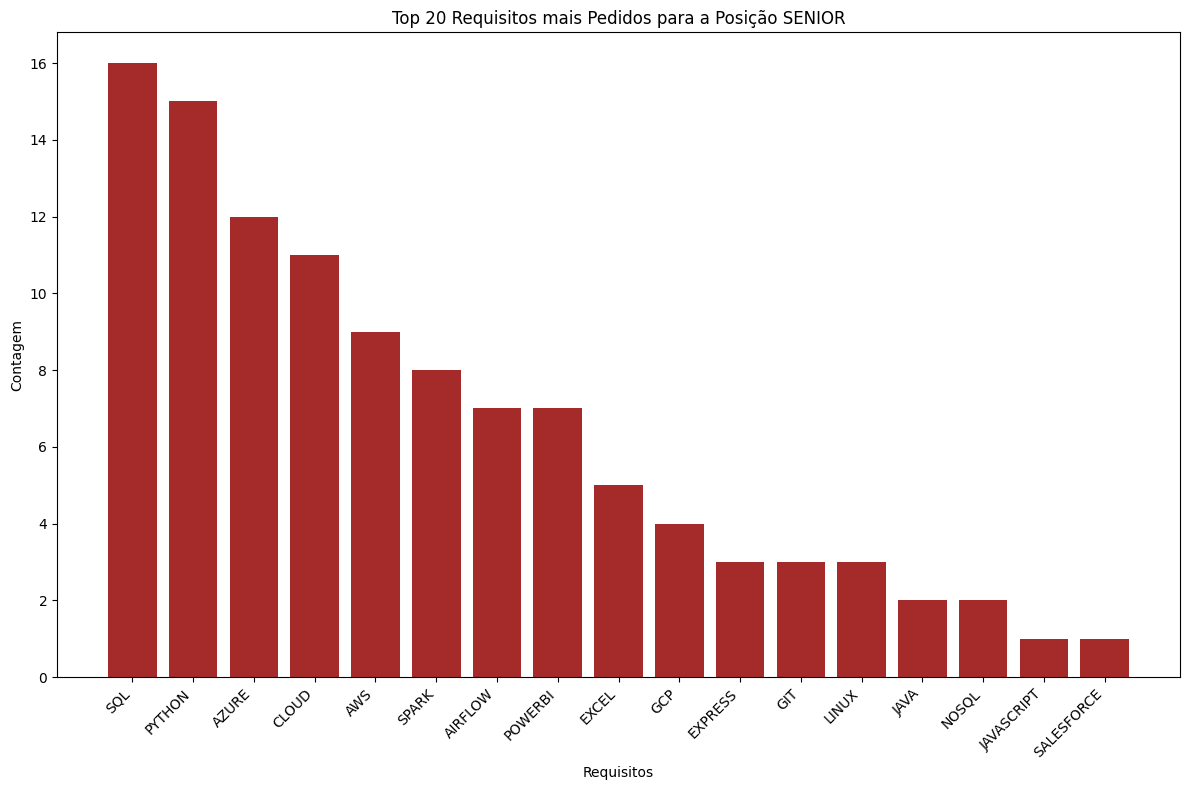

In [198]:
dados_senior = contagem_requisitos.loc['SÊNIOR']

# Selecionar apenas os 10 primeiros requisitos mais pedidos
dados_junior_top10 = dados_senior.head(20)

# Criar o gráfico de barras
plt.figure(figsize=(12, 8))
plt.bar(dados_junior_top10.index, dados_junior_top10.values, color='brown')
plt.xlabel('Requisitos')
plt.ylabel('Contagem')
plt.title('Top 20 Requisitos mais Pedidos para a Posição SENIOR')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [199]:
# dados_nao_nulos.drop(columns=['lista'], inplace=True)

In [200]:
vagas_junior=dados_nao_nulos[dados_nao_nulos.posicao=="JUNIOR"]

In [201]:
vagas_junior.to_excel("vagas_junior.xlsx")

ModuleNotFoundError: No module named 'openpyxl'

In [ ]:
dados_nao_nulos